In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('phones_data.csv')
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


# Ensuring Data Reliability

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [5]:
df.count()

brand_name        1224
model_name        1224
os                1027
popularity        1224
best_price        1224
lowest_price       964
highest_price      964
sellers_amount    1224
screen_size       1222
memory_size       1112
battery_size      1214
release_date      1224
dtype: int64

In [6]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


<AxesSubplot:>

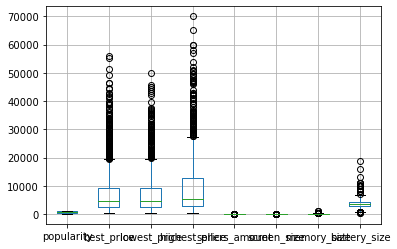

In [7]:
df.boxplot()

In [8]:
#Evaluating outliers
df.quantile([0,0.25,0.5,0.75,1])

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0.00,1.00,214.00,198.00,229.00,1.0,1.4000,0.0032,460.0
0.25,306.75,2599.75,2399.00,2887.00,2.0,5.1625,32.0000,2900.0
0.50,612.50,4728.00,4574.00,5325.50,8.0,6.0000,64.0000,3687.0
0.75,918.25,9323.00,9262.25,12673.75,26.0,6.4000,128.0000,4400.0
1.00,1224.00,56082.00,49999.00,69999.00,125.0,8.1000,1000.0000,18800.0


In [9]:
#Popularity_Outliers
Pop_Q1=df['popularity'].quantile(0.25)
Pop_Q3=df['popularity'].quantile(0.75)
Pop_IQR = Pop_Q3 - Pop_Q1
Pop_upper = Pop_Q3 + Pop_IQR*1.5
Pop_lower = Pop_Q1 - Pop_IQR*1.5
Pop_outlier = df[(df['popularity']>Pop_upper)|(df['popularity']<Pop_lower)]
Pop_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date


In [10]:
#No outliers in popularity

In [11]:
#best_price_Outliers
best_price_Q1=df['best_price'].quantile(0.25)
best_price_Q3=df['best_price'].quantile(0.75)
best_price_IQR = best_price_Q3 - best_price_Q1
best_price_upper = best_price_Q3 + best_price_IQR*1.5
best_price_lower = best_price_Q1 - best_price_IQR*1.5
best_price_outlier = df[(df['best_price']>best_price_upper)|(df['best_price']<best_price_lower)]
best_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
112,OnePlus,8 Pro 12/256GB Glacial Green,Android,1095,22587.0,21778.0,25999.0,32,6.78,256.0,4510.0,4-2020
113,OnePlus,8 Pro 8/128GB Onyx Black,Android,1161,20709.0,20095.0,21999.0,23,6.78,128.0,4510.0,4-2020
122,OnePlus,8T 12/256GB Cyberpunk 2077 Limited Edition,Android,938,23999.0,23999.0,24000.0,2,6.55,256.0,4500.0,1-2021
356,OPPO,Find X2 12/256GB Ocean Black,Android,590,29999.0,NaN,NaN,2,6.70,256.0,4200.0,4-2020
357,OPPO,Find X2 Pro 12/512GB Orange,Android,474,32530.0,31720.0,33999.0,4,6.70,512.0,4260.0,1-2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Apple,iPhone XS 64GB Space Gray (MT9E2),iOS,1187,19790.0,12505.0,23928.0,53,5.80,64.0,2568.0,9-2018
1217,Apple,iPhone XS Max 256GB Gold (MT552),iOS,1128,24184.0,18399.0,30600.0,37,6.50,256.0,3174.0,9-2018
1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,9-2018
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018


In [12]:
#removing_best_price _outlier
df=df[~(df['best_price']>best_price_upper)|(df['best_price']<best_price_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,Apple,iPhone XR 64GB Black (MRY42),iOS,1218,16938.0,12049.0,19870.0,125,6.10,64.0,2942.0,9-2018
1211,Apple,iPhone XR 64GB Slim Box Black (MH6M3),iOS,843,17977.0,16046.0,20999.0,24,6.10,64.0,2942.0,11-2020
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.0,18500.0,19010.0,2,6.65,128.0,4500.0,10-2020


In [13]:
#best_price_Outliers
sellers_amount_Q1=df['sellers_amount'].quantile(0.25)
sellers_amount_Q3=df['sellers_amount'].quantile(0.75)
sellers_amount_IQR = sellers_amount_Q3 - sellers_amount_Q1
sellers_amount_upper = sellers_amount_Q3 + sellers_amount_IQR*1.5
sellers_amount_lower = sellers_amount_Q1 - sellers_amount_IQR*1.5
sellers_amount_outlier = df[(df['sellers_amount']>sellers_amount_upper)|(df['sellers_amount']<sellers_amount_lower)]
sellers_amount_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
36,Nokia,150 Black,NaN,920,1180.0,959.0,1479.0,61,2.40,NaN,1020.0,2-2017
62,Nokia,230 Dual Dark Silver (A00026971),NaN,860,1847.0,1725.0,1939.0,54,2.80,0.016,1200.0,12-2015
162,OPPO,A52 4/64GB Twilight Black,Android,1094,5448.0,4857.0,6031.0,65,6.50,64.000,5000.0,5-2020
164,OPPO,A53 4/64GB Black,Android,1145,5257.0,4407.0,6658.0,66,6.50,64.000,5000.0,10-2020
175,OPPO,A73 4/128GB Navy Blue,Android,1097,6615.0,5949.0,6999.0,55,6.44,128.000,4015.0,12-2020
198,Ulefone,Armor Mini Black,NaN,318,1274.0,1149.0,1511.0,57,2.40,0.032,2500.0,6-2018
223,Blackview,BV5500 2/16GB Black,Android,772,2596.0,2149.0,3099.0,54,5.50,16.000,4400.0,2-2019
232,Blackview,BV6800 Pro 4/64GB Black,Android,821,6801.0,4640.0,7399.0,55,5.70,64.000,6580.0,11-2018
260,ZTE,Blade A3 2020 1/32GB Blue,Android,700,2016.0,1839.0,2229.0,56,5.45,32.000,2600.0,3-2020
270,ZTE,Blade A7 2020 2/32GB Gradient,Android,1016,2783.0,2599.0,2999.0,56,6.08,32.000,4000.0,12-2019


In [14]:
#removing_sellers_outlier
df=df[~(df['sellers_amount']>sellers_amount_upper)|(df['sellers_amount']<sellers_amount_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Apple,iPhone X 256GB Silver (MQAG2),iOS,1186,18713.0,9835.0,23113.0,43,5.80,256.0,2716.0,9-2017
1206,Apple,iPhone X 64GB Space Gray (MQAC2),iOS,1212,14185.0,11000.0,21113.0,25,5.80,64.0,2716.0,9-2017
1211,Apple,iPhone XR 64GB Slim Box Black (MH6M3),iOS,843,17977.0,16046.0,20999.0,24,6.10,64.0,2942.0,11-2020
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019


In [15]:
#lowest_price_Outliers
lowest_price_Q1=df['lowest_price'].quantile(0.25)
lowest_price_Q3=df['lowest_price'].quantile(0.75)
lowest_price_IQR = lowest_price_Q3 - lowest_price_Q1
lowest_price_upper = lowest_price_Q3 + lowest_price_IQR*1.5
lowest_price_lower = lowest_price_Q1 - lowest_price_IQR*1.5
lowest_price_outlier = df[(df['lowest_price']>lowest_price_upper)|(df['lowest_price']<lowest_price_lower)]
lowest_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
97,OnePlus,6T 8/256GB Midnight Black,Android,661,15625.0,15080.0,16213.0,8,6.41,256.0,3700.0,10-2018
104,OnePlus,7 8/256GB Mirror Gray,Android,1022,14443.0,13920.0,15449.0,11,6.41,256.0,3700.0,7-2019
107,OnePlus,8 12/256GB Onyx Black,Android,1067,17172.0,16500.0,18497.0,11,6.55,256.0,4300.0,4-2020
110,OnePlus,8 8/128GB Onyx Black,Android,1155,15840.0,14863.0,16999.0,13,6.55,128.0,4300.0,4-2020
114,Nokia,8.3 5G 8/128GB Polar Night,Android,1055,19041.0,18500.0,20517.0,18,6.81,128.0,4500.0,10-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Apple,iPhone 8 Plus 256GB Space Gray (MQ8G2),iOS,911,19043.0,12729.0,23928.0,40,5.50,256.0,NaN,9-2017
1197,Apple,iPhone SE 2020 128GB Slim Box Black (MHGT3),iOS,755,15937.0,14200.0,18999.0,29,4.70,128.0,1828.0,11-2020
1199,Apple,iPhone SE 2020 256GB Slim Box White (MHGX3),iOS,450,16104.0,15220.0,18003.0,15,4.70,256.0,1828.0,11-2020
1211,Apple,iPhone XR 64GB Slim Box Black (MH6M3),iOS,843,17977.0,16046.0,20999.0,24,6.10,64.0,2942.0,11-2020


In [16]:
#removing_lowest_price_outlier
df= df[~(df['lowest_price']>lowest_price_upper)|(df['lowest_price']<lowest_price_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,770,7328.0,5190.0,10959.0,3,4.00,64.0,1624.0,3-2016
1204,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,768,7328.0,5190.0,10959.0,3,4.00,64.0,1624.0,3-2016
1205,Apple,iPhone X 256GB Silver (MQAG2),iOS,1186,18713.0,9835.0,23113.0,43,5.80,256.0,2716.0,9-2017
1206,Apple,iPhone X 64GB Space Gray (MQAC2),iOS,1212,14185.0,11000.0,21113.0,25,5.80,64.0,2716.0,9-2017


In [17]:
#highest_price_Outliers
highest_price_Q1=df['highest_price'].quantile(0.25)
highest_price_Q3=df['highest_price'].quantile(0.75)
highest_price_IQR = highest_price_Q3 - highest_price_Q1
highest_price_upper = highest_price_Q3 + highest_price_IQR*1.5
highest_price_lower = highest_price_Q1 - highest_price_IQR*1.5
highest_price_outlier = df[(df['highest_price']>highest_price_upper)|(df['highest_price']<highest_price_lower)]
highest_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
189,Ulefone,Armor 10 5G 8/128GB Black,Android,146,12913.0,12072.0,13499.0,5,6.67,128.0,5800.0,1-2021
196,Ulefone,Armor 9E 8/128GB Black (6937748733805),Android,816,11062.0,9610.0,13092.0,17,6.30,128.0,6600.0,9-2020
197,Ulefone,Armor 9E 8/128GB Black (6937748733805),Android,818,11062.0,9610.0,13092.0,17,6.30,128.0,6600.0,9-2020
251,Blackview,BV9900 Pro 8/128GB Gray,Android,802,12667.0,12077.0,14279.0,6,5.84,128.0,4380.0,6-2020
374,LG,G8X ThinQ 6/128GB Aurora Black,Android,931,17790.0,9888.0,20590.0,21,6.40,128.0,4000.0,3-2020
468,Samsung,Galaxy Note10 Lite SM-N770F Dual 8/128GB Black...,Android,915,12169.0,11699.0,13098.0,27,6.70,128.0,4500.0,3-2020
476,Samsung,Galaxy S10 Lite SM-G770 6/128GB Black (SM-G770...,Android,1190,14079.0,12049.0,15469.0,4,6.70,128.0,4500.0,1-2020
533,Samsung,Galaxy S9 SM-G960 DS 64GB Black (SM-G960FZKD),Android,1105,11207.0,9050.0,13880.0,5,5.80,64.0,3000.0,2-2018
540,Samsung,Galaxy S9+ SM-G965 DS 64GB Black (SM-G965FZKD),Android,1135,13837.0,10048.0,17966.0,16,6.20,64.0,3500.0,2-2018
601,Xiaomi,Mi 10 Lite 6/128GB Cosmic Grey,Android,926,11104.0,8649.0,13083.0,9,6.57,128.0,4160.0,6-2020


In [18]:
#removing_highest_price_outlier
df=df[~(df['highest_price']>highest_price_upper)|(df['highest_price']<highest_price_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Apple,iPhone SE 16GB Space Gray (MLLN2),iOS,853,6240.0,4200.0,7524.0,3,4.00,16.0,1624.0,3-2016
1202,Apple,iPhone SE 32GB Space Grey (MP822),iOS,887,7991.0,4949.0,9941.0,11,4.00,32.0,1624.0,3-2017
1203,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,770,7328.0,5190.0,10959.0,3,4.00,64.0,1624.0,3-2016
1204,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,768,7328.0,5190.0,10959.0,3,4.00,64.0,1624.0,3-2016


In [19]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,946.000000,946.000000,693.000000,693.000000,946.000000,945.000000,837.000000,942.000000
mean,531.082452,4226.447146,3643.809524,4307.761905,11.473573,5.157503,61.145025,3532.356688
std,325.468489,3106.367372,2488.009205,2929.804048,13.186567,1.550415,59.297083,1811.890294
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,254.250000,2049.000000,1659.000000,1999.000000,2.000000,5.000000,16.000000,2612.500000
50%,513.500000,3692.000000,3399.000000,3895.000000,5.000000,5.700000,64.000000,3500.000000
75%,787.750000,5669.000000,5190.000000,5957.000000,18.000000,6.300000,64.000000,4350.000000
max,1217.000000,18739.000000,11898.000000,12898.000000,52.000000,7.120000,512.000000,18800.000000


<AxesSubplot:>

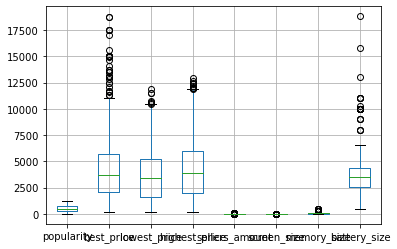

In [20]:
df.boxplot()

In [21]:
df.count()

brand_name        946
model_name        946
os                755
popularity        946
best_price        946
lowest_price      693
highest_price     693
sellers_amount    946
screen_size       945
memory_size       837
battery_size      942
release_date      946
dtype: int64

In [22]:
df.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [23]:
screen_size_mode=df['screen_size'].mode()
screen_size_mode

0    5.5
dtype: float64

In [24]:
battery_size_mode=df['battery_size'].mode()
battery_size_mode

0    4000.0
dtype: float64

In [25]:
df['screen_size'].fillna('2.4', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
df['battery_size'].fillna('4000.0', inplace=True)

In [27]:
os_mode=df['os'].mode()
os_mode

0    Android
dtype: object

In [28]:
df['os'].fillna('Android', inplace=True)

In [29]:
highest_price_mean=df['highest_price'].mean()
highest_price_mean

4307.761904761905

In [30]:
df['highest_price'].fillna('4307.761904761905', inplace=True)

In [31]:
lowest_price_mean=df['lowest_price'].mean()
lowest_price_mean

3643.809523809524

In [32]:
df['lowest_price'].fillna('3643.809523809524', inplace=True)

In [33]:
df.shape

(946, 12)

In [34]:
df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,3643.809523809524,4307.761904761905,10,5.71,16.0,3000.0,4-2020


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 1221
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      946 non-null    object 
 1   model_name      946 non-null    object 
 2   os              946 non-null    object 
 3   popularity      946 non-null    int64  
 4   best_price      946 non-null    float64
 5   lowest_price    946 non-null    object 
 6   highest_price   946 non-null    object 
 7   sellers_amount  946 non-null    int64  
 8   screen_size     946 non-null    object 
 9   memory_size     837 non-null    float64
 10  battery_size    946 non-null    object 
 11  release_date    946 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 96.1+ KB


In [36]:
df[['highest_price','lowest_price','screen_size','battery_size']]=df[['highest_price','lowest_price','screen_size','battery_size']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 1221
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      946 non-null    object 
 1   model_name      946 non-null    object 
 2   os              946 non-null    object 
 3   popularity      946 non-null    int64  
 4   best_price      946 non-null    float64
 5   lowest_price    946 non-null    float64
 6   highest_price   946 non-null    float64
 7   sellers_amount  946 non-null    int64  
 8   screen_size     946 non-null    float64
 9   memory_size     837 non-null    float64
 10  battery_size    946 non-null    float64
 11  release_date    946 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 96.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [68]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,837.000000,946.000000
mean,531.082452,4226.447146,3643.809524,4307.761905,11.473573,5.154588,61.145025,3534.334038
std,325.468489,3106.367372,2129.066006,2507.123442,13.186567,1.552186,59.297083,1808.306425
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,254.250000,2049.000000,2416.500000,2899.000000,2.000000,5.000000,16.000000,2650.000000
50%,513.500000,3692.000000,3643.809524,4307.761905,5.000000,5.700000,64.000000,3500.000000
75%,787.750000,5669.000000,4440.000000,5199.000000,18.000000,6.300000,64.000000,4350.000000
max,1217.000000,18739.000000,11898.000000,12898.000000,52.000000,7.120000,512.000000,18800.000000


# Establishing Correlations

In [67]:
df.describe(include=['object'])

,brand_name,model_name,os,release_date
count,946,946,946,946
unique,63,802,5,73
top,Xiaomi,15 4/64GB Black,Android,10-2020
freq,95,3,914,41


In [69]:
df[['popularity','best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']].corr()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
popularity,1.000000,0.160302,0.216364,0.238066,0.325462,0.260220,0.167145,0.215134
best_price,0.160302,1.000000,0.728894,0.728485,-0.249402,0.609906,0.745820,0.392908
lowest_price,0.216364,0.728894,1.000000,0.966861,-0.253364,0.650415,0.518538,0.464614
highest_price,0.238066,0.728485,0.966861,1.000000,-0.215123,0.618242,0.489375,0.433392
sellers_amount,0.325462,-0.249402,-0.253364,-0.215123,1.000000,-0.244591,-0.073859,-0.058532
screen_size,0.260220,0.609906,0.650415,0.618242,-0.244591,1.000000,0.469979,0.622145
memory_size,0.167145,0.745820,0.518538,0.489375,-0.073859,0.469979,1.000000,0.316307
battery_size,0.215134,0.392908,0.464614,0.433392,-0.058532,0.622145,0.316307,1.000000


In [39]:
from scipy import stats

# Is seller_amounts correlated with popularity?

In [70]:
pearson_coef, p_value=stats.pearsonr(df['sellers_amount'],df['popularity'])
pearson_coef, p_value

(0.3254616419102554, 8.840721434687363e-25)

## Somehow correlated and this corrlation isn't due to chance

Text(0.5, 1.0, 'Popularity VS Sellers_Amount')

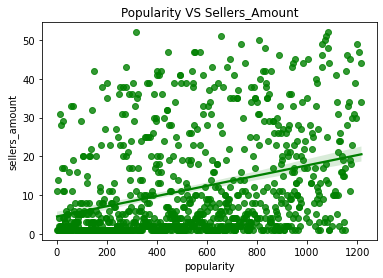

In [71]:
sns.regplot(x='popularity',y='sellers_amount', data=df, color='green')
plt.title('Popularity VS Sellers_Amount')

Text(0.5, 1.0, 'Popularity VS Sellers_Amount')

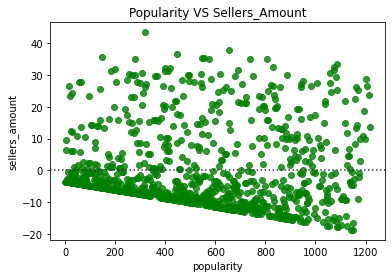

In [72]:
sns.residplot(x='popularity',y='sellers_amount', data=df, color='green')
plt.title('Popularity VS Sellers_Amount')

# So, both sellers amount and popularity are weak correlated

#### so, as shown , there is a weak correlation. This correlation is statistically significant and not due to chance

**lets examine screen size vs best price**

In [73]:
pearson_coef, p_value =stats.pearsonr(df['screen_size'],df['best_price'])
pearson_coef, p_value

(0.6099056375715237, 1.86290066056555e-97)

### The correlation is  strong positive  and it's statistically significant and not due to chance

Text(0.5, 1.0, 'Screen Size Vs Best Price')

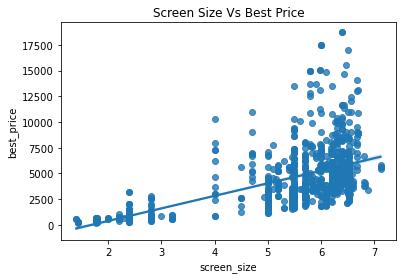

In [75]:
sns.regplot(x='screen_size',y='best_price',data=df)
plt.title('Screen Size Vs Best Price')

In [76]:
#let's examine popularity and best price

In [82]:
pearson_coef, p_value=stats.pearsonr(df['popularity'],df['best_price'])
pearson_coef, p_value

(0.16030246378001392, 7.195720106634352e-07)

Text(0.5, 1.0, 'Popularity Vs Best Price')

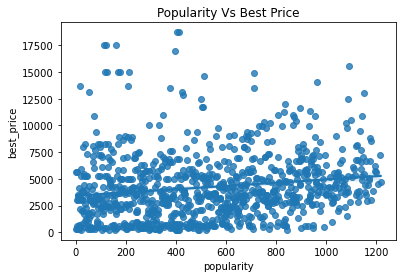

In [83]:
sns.regplot(x='popularity',y='best_price',data=df)
plt.title('Popularity Vs Best Price')

# so we could say that popularity is a weak indicator for seller amounts, and price, and screen size is a very good indicator for price

In [45]:
#so lets examine categorical variables

In [90]:
brand_category=df.groupby('brand_name')['best_price'].mean()
brand_category=brand_category.to_frame().reset_index()
brand_category

,brand_name,best_price
0,2E,1088.000000
1,AGM,7003.100000
2,ALCATEL,1945.312500
3,ASUS,12267.600000
4,Apple,6189.500000
...,...,...
58,ZTE,3029.750000
59,iOutdoor,1048.000000
60,myPhone,5600.000000
61,realme,6232.862069


In [91]:
brand_category.sort_values('best_price', ascending=False, axis=0, inplace=True)

In [92]:
#Top 10 Brands by price
brand_category=brand_category.head(10)
#brand_category.set_index('brand_name', inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by best price')

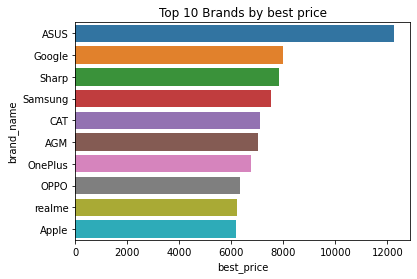

In [94]:
sns.barplot(y='brand_name', x='best_price', data=brand_category)
plt.title('Top 10 Brands by best price')

In [50]:
#ASUS is the best price brand followed by GOOGLE and apple at the bottom of the list

In [115]:
#most_popular
Popularity_category=df.groupby('brand_name')['popularity'].sum()
Popularity_category=Popularity_category.to_frame().reset_index()

In [116]:
Popularity_category

,brand_name,popularity
0,2E,5808
1,AGM,4233
2,ALCATEL,7411
3,ASUS,1569
4,Apple,14561
...,...,...
58,ZTE,13254
59,iOutdoor,122
60,myPhone,4
61,realme,18756


Text(0.5, 1.0, 'Top 10 Brands by popularity')

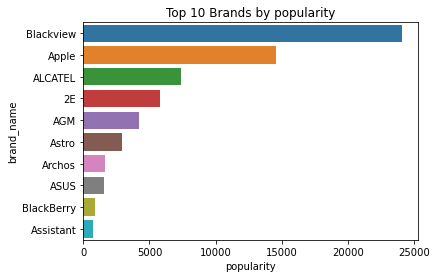

In [120]:
#Top 10 Brands by popularity
Popularity_category=Popularity_category.head(10).sort_values('popularity',ascending=False)

sns.barplot(y="brand_name", x="popularity", data=Popularity_category)
plt.title("Top 10 Brands by popularity")


In [55]:
#blakview is the most popular followed by apple

In [131]:
#highest_price_popular
highest_price_category=df.groupby('brand_name')['highest_price'].mean()
highest_price_category=highest_price_category.to_frame().reset_index()
highest_price_category

,brand_name,highest_price
0,2E,1675.894558
1,AGM,5223.052381
2,ALCATEL,2365.845238
3,ASUS,4606.009524
4,Apple,7173.200397
...,...,...
58,ZTE,3133.290476
59,iOutdoor,1049.000000
60,myPhone,4307.761905
61,realme,5124.781609


In [132]:
highest_price_category.sort_values('highest_price', ascending=False, axis=0, inplace=True)
highest_price_category

,brand_name,highest_price
47,Sharp,9999.000000
12,CAT,7953.500000
22,Google,7321.410714
4,Apple,7173.200397
40,OnePlus,6785.253968
...,...,...
33,Maxcom,726.333333
21,Globex,705.000000
19,Fly,608.000000
43,Prestigio,599.000000


Text(0.5, 1.0, 'Top 10 Brands by highest_price')

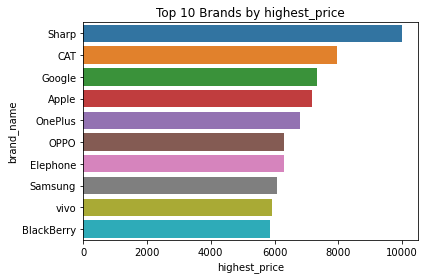

In [133]:
#Top 10 Brands by highest price
highest_price_category=highest_price_category.head(10)
sns.barplot(y="brand_name", x="highest_price", data=highest_price_category)
plt.title("Top 10 Brands by highest_price")


In [60]:
#highest price is Sharp followed by CAT

In [134]:
#lowest_price_popular
lowest_price_category=df.groupby('brand_name')['lowest_price'].mean()
lowest_price_category=lowest_price_category.to_frame().reset_index()
lowest_price_category

,brand_name,lowest_price
0,2E,1372.472789
1,AGM,4438.861905
2,ALCATEL,1906.288690
3,ASUS,4020.647619
4,Apple,4866.001984
...,...,...
58,ZTE,2626.752381
59,iOutdoor,1048.000000
60,myPhone,3643.809524
61,realme,4430.735632


In [135]:
lowest_price_category.sort_values('lowest_price', ascending=False, axis=0, inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by lowest_price')

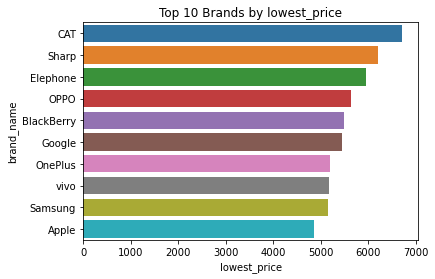

In [137]:
#Top 10 Brands by lowest price
lowest_price_category=lowest_price_category.head(10)
sns.barplot(y="brand_name", x="lowest_price", data=lowest_price_category)
plt.title("Top 10 Brands by lowest_price")

In [65]:
# lowest price cat and sharp , seems that they have a wide variety range of products

# Let's Visualize the OS

In [167]:
os_category=df.groupby(['os','brand_name'])['sellers_amount'].sum().to_frame().reset_index()

sellers_amount_pivot=pd.pivot_table(data=os_category,columns='brand_name',values='sellers_amount', index='os')
sellers_amount_pivot

brand_name,2E,AGM,ALCATEL,ASUS,Apple,Archos,Assistant,Astro,BlackBerry,Blackview,...,Ulefone,Vernee,Viaan,Vodafone,Xiaomi,ZTE,iOutdoor,myPhone,realme,vivo
os,,,,,,,,,,,,,,,,,,,,,
Android,251.0,66.0,448.0,6.0,NaN,32.0,32.0,74.0,2.0,708.0,...,552.0,12.0,56.0,2.0,835.0,571.0,4.0,1.0,209.0,266.0
KAIOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OxygenOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindowsPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iOS,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'sellers amount by os')

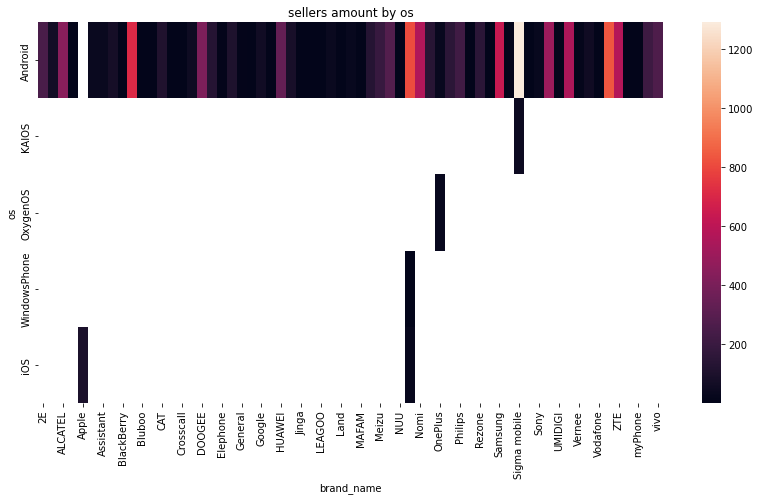

In [173]:
plt.figure(figsize=(14,7))
sns.heatmap(sellers_amount_pivot)
plt.title('sellers amount by os')

# Data Findings:
    1-so we could say that popularity is a weak indicator for seller amounts, and price, and screen size is a very good      
      indicator for price
    2-ASUS is the best price brand followed by GOOGLE and apple at the bottom of the list
    3-blakview is the most popular followed by apple
    4-highest price is Sharp followed by CAT
    5-lowest price cat and sharp , seems that they have a wide variety range of products
    6-Android is the best seller among os

In [174]:
df.to_csv('Mobile_phones.csv')